In [1]:
import numpy as np
import sympy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
sp.init_printing()

In [3]:
x, y = sp.symbols('x y')

In [63]:
x_max = sp.Symbol('x_\mathrm{max}')
y_max = sp.Symbol('y_\mathrm{max}')
x_max_val = 1.
y_max_val = 1.

In [64]:
x_points = np.linspace(0., x_max_val, 1000)
y_points = np.linspace(0., y_max_val, 1000)

In [68]:
y_0 = y_max / 2

u = x * sp.tanh((y_max - y)/(x_max - x))*sp.tanh(y/(x_max - x))
v = (y - y_0) * sp.sin(sp.pi*sp.Symbol('u')/x_max) + y_0

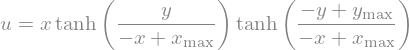

In [81]:
sp.Eq(sp.Symbol('u'), u)

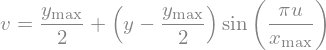

In [76]:
sp.Eq(sp.Symbol('v'), v)

In [82]:
v = v.subs(sp.Symbol('u'), u)

In [85]:
u_func = sp.lambdify([x, y], u.subs(x_max, x_max_val).subs(y_max, y_max_val), modules=['numpy'])
v_func = sp.lambdify([x, y], v.subs(x_max, x_max_val).subs(y_max, y_max_val), modules=['numpy'])

<lambdifygenerated-14>:2: RuntimeWarning: invalid value encountered in true_divide
  return (x*tanh(y/(1.0 - x))*tanh((1.0 - y)/(1.0 - x)))
<lambdifygenerated-14>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (x*tanh(y/(1.0 - x))*tanh((1.0 - y)/(1.0 - x)))
<lambdifygenerated-15>:2: RuntimeWarning: invalid value encountered in true_divide
  return ((y - 0.5)*sin(pi*x*tanh(y/(1.0 - x))*tanh((1.0 - y)/(1.0 - x))) + 0.5)
<lambdifygenerated-15>:2: RuntimeWarning: divide by zero encountered in true_divide
  return ((y - 0.5)*sin(pi*x*tanh(y/(1.0 - x))*tanh((1.0 - y)/(1.0 - x))) + 0.5)
<lambdifygenerated-14>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (x*tanh(y/(1.0 - x))*tanh((1.0 - y)/(1.0 - x)))
<lambdifygenerated-15>:2: RuntimeWarning: divide by zero encountered in true_divide
  return ((y - 0.5)*sin(pi*x*tanh(y/(1.0 - x))*tanh((1.0 - y)/(1.0 - x))) + 0.5)
<lambdifygenerated-14>:2: RuntimeWarning: divide by zero encountered in true_divide


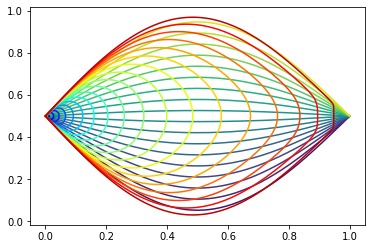

In [111]:
colors = plt.cm.viridis(np.linspace(0,1,20))

for c, y_val in zip(colors, np.linspace(0., y_max_val, 20)):
    plt.plot(u_func(x_points, y_val*np.ones(len(x_points))), v_func(x_points, y_val*np.ones(len(x_points))), color=c)
    
colors = plt.cm.jet(np.linspace(0,1,20))
    
for c, x_val in zip(colors, np.linspace(0., x_max_val, 20)):
    plt.plot(u_func(x_val*np.ones(len(y_points)), y_points), v_func(x_val*np.ones(len(y_points)), y_points), color=c)

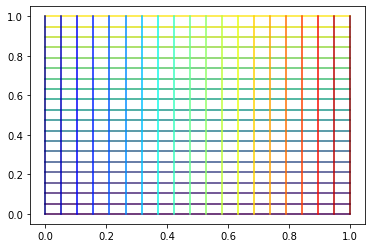

In [110]:
colors = plt.cm.viridis(np.linspace(0,1,20))

for c, y_val in zip(colors, np.linspace(0., y_max_val, 20)):
    plt.plot(x_points, y_val*np.ones(len(x_points)), color=c)
    
colors = plt.cm.jet(np.linspace(0,1,20))
    
for c, x_val in zip(colors, np.linspace(0., x_max_val, 20)):
    plt.plot(x_val*np.ones(len(y_points)), y_points, color=c)